In [3]:
import numpy as np
import matplotlib.pyplot as plt

 ## Modelo Parcial
 
 <figure><img src="../../../images/modelo_musculo.png\" width=400 />

## Dedução
   Para $L_T < L_{SL}$ , temos:
   
   $F_{SEE} = 0 $ (1)
   
   Para $L_T >= L_{SL}$ , temos:
   
   $F_{SEE} = K(L - L_{SL})^2$ (2)
   
   A força $F_{CE}$ é dada por:
   
   Para $L_{CE} < 0$
   
   $F_{CE} = \frac{bF_0 + a\frac{dL_{CE}}{dt}}{b - \frac{dL_{CE}}{dt}}$ (3)
   
   Sabemos que:
  
   $F = F_{SEE} = F_{CE}$ (4)
   
   $a\frac{dL_{CE}}{dt} + bF_0 = F_{CE}b - \frac{dL_{CE}}{dt}F_{CE} $ (5)
   
   $\frac{dL_{CE}}{dt} (a + F_{CE}) = b(F_{CE} - F_0)$ (6)
   
   $\frac{dL_{CE}}{dt} = \frac{b(F_{CE} - F_0)}{(a + F_{CE})}$ (7)
   
   $L_{SEE} = L_m - L_{CE}$ (8)

## Resolução

In [4]:
## Propriedades

L_SL = 0.223
Umax = 0.04
L_CEOPT = 0.093
width = 0.63*L_CEOPT
Fmax = 7400
a = 0.25*Fmax
b = 0.25*10*L_CEOPT

## Condições Iniciais
L_CE = 0.087
dt = 0.001
t = np.arange(0,3,dt)
F = np.empty_like(t)

In [5]:
def dLCEdt (a,b,F_0,F):
    return -b*(F_0-F)/(F+a)

In [6]:
for i in range(1,len(t)):
    
    if t[i] <= 1:
        L_m = 0.31
    elif (t[i]>1 and t[i] < 2):
        L_m = 0.31 - 0.04 * (t[i] - 1)
        
    L_SEE = L_m - L_CE
    
    if L_SEE < L_SL:
        F[i] = 0
    else:
        F[i] = Fmax*((L_SEE - L_SL)/(Umax*L_SL))**2
        #K = Fmax/Umax^2
        
    F_0 = max(0,Fmax*(1-((L_CE-L_CEOPT)/width)**2))
    
    L_CE = L_CE + dt*dLCEdt (a,b,F_0,F[i])

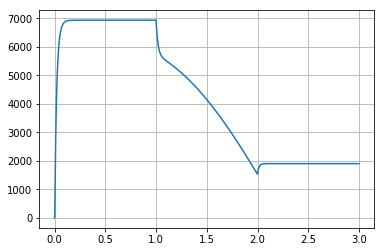

In [7]:
plt.plot(t,F)
plt.grid()
plt.show()

## Modelo Completo
<figure><img src="../../../images/modelo_musculo2.png\" width=400 />


## Dedução
   Para $L_T < L_{SL}$ , temos:
   
   $F_{SEE} = 0 $ (1)
   
   Para $L_T >= L_{SL}$ , temos:
   
   $F_{SEE} = K(L - L_{SL})^2$ (2)
   
   A força $F_{CE}$ é dada por:
   
   Para $L_{CE} < 0$
   
   $F_{CE} = \frac{bF_0 + a\frac{dL_{CE}}{dt}}{b - \frac{dL_{CE}}{dt}}$ (3)
   
   $F_{KPE}$ é dado por:
   
   Para $L_{CE} < L_{op}$
   
   $F_{KPE} = 0 $
   
   Para $L_{CE} > L_{op}$
   
   $F_{KPE} = K(L - L_{op})^2$ (4)
   
   Sabemos que:
  
   $F = F_{SEE} - F_{KPE} = F_{CE} $ (5)
   
   Dessa forma:
   
   $a\frac{dL_{CE}}{dt} + bF_0 = (F - F_{KPE})b - \frac{dL_{CE}}{dt}(F - F_{KPE}) $ (6)
   
   $\frac{dL_{CE}}{dt} (a + F - F_{KPE}) = b(F - F_{KPE} - F_0)$ (7)
   
   $\frac{dL_{CE}}{dt} = \frac{b(F - F_{KPE} - F_0)}{(a + F - F_{KPE})}$ (8)
   
   $L_{SEE} = L_m - L_{CE}$ (9)

In [8]:
## Propriedades

L_SL = 0.223
Umax = 0.04
L_CEOPT = 0.093
width = 0.63*L_CEOPT
Fmax = 7400
a = 0.25*Fmax
b = 0.25*10*L_CEOPT

## Condições Iniciais
L_CE = 0.087
dt = 0.001
t = np.arange(0,3,dt)
F = np.empty_like(t)
F_kpe = np.empty_like(t)
F_tot= np.empty_like(t)

In [9]:
def dLCEdt (a,b,F_0,F,F_kpe):
    return -b*(F_0-F+F_kpe)/(F-F_kpe+a)

In [10]:
for i in range(1,len(t)):
    
    if t[i] <= 1:
        L_m = 0.31
    elif (t[i]>1 and t[i] < 2):
        L_m = 0.31 - 0.04 * (t[i] - 1)
        
    L_SEE = L_m - L_CE
    
    if L_SEE < L_SL:
        F[i] = 0
    else:
        F[i] = Fmax*((L_SEE - L_SL)/(Umax*L_SL))**2
        #K = Fmax/Umax^2
        
    if L_CE < L_CEOPT:
        F_kpe[i] = 0
    else:
        F_kpe[i] = Fmax*((L_CE - L_CEOPT)/(Umax*L_SL))**2
        
    F_0 = max(0,Fmax*(1-((L_CE-L_CEOPT)/width)**2))
        
    L_CE = L_CE + dt*dLCEdt (a,b,F_0,F[i],F_kpe[i])
    

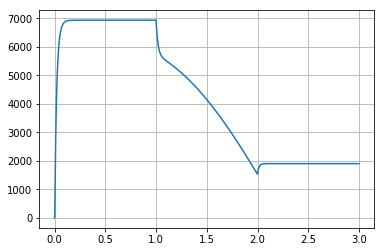

In [11]:
plt.plot(t,F)
plt.grid()
plt.show()